<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_AB/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [2]:
!pip install ftfy

     |████████████████████████████████| 64 kB 2.6 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=ba318fdb07ffecf5e44e0b4c7d54be6128006c2a46aad8f2f7e994b5e99e05da
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [4]:
pip install nlpaug

     |████████████████████████████████| 409 kB 8.7 MB/s 
     |████████████████████████████████| 11.3 MB 53.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [1]:
#importing libraries
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
# Load the dataset into a Pandas dataframe called ticket and check the head of the dataset
dataset = pd.read_excel('sample_data/input_data.xlsx', )
dataset.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
dataset.shape

(8500, 4)

In [ ]:
# Describe the dataset with various summary and statistics
dataset.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

In [ ]:
# Check the Short description of tickets having Description as only 'the'
dataset[dataset.Description == 'the']

Short description Description  \
1049  reset passwords for soldfnbq uhnbsvqd using pa...         the   
1054  reset passwords for fygrwuna gomcekzi using pa...         the   
1144  reset passwords for wvdxnkhf jirecvta using pa...         the   
1184  reset passwords for pxvjczdt kizsjfpq using pa...         the   
1292  reset passwords for cubdsrml znewqgop using pa...         the   
1476  reset passwords for bnoupaki cpeioxdz using pa...         the   
1558  reset passwords for usa feathers using passwor...         the   
1693  reset passwords for eglavnhx uprodleq using pa...         the   
1834  reset passwords for hybiaxlk lawptzir using pa...         the   
1850  reset passwords for fylrosuk kedgmiul using pa...         the   
1851  reset passwords for fylrosuk kedgmiul using pa...         the   
2151  reset passwords for gjisfonb odwfhmze using pa...         the   
2532  reset passwords for qwsjptlo hnlasbed using pa...         the   
2533  reset passwords for qwsjptlo hnlasbed using pa...         the   
2553  reset passwords for bxeagsmt zrwdgsco using pa...         the   
2554  reset passwords for bxeagsmt zrwdgsco using pa...         the   
2572  reset passwords for prgewfly ndtfvple using pa...         the   
2602  reset passwords for wxdvjoct ckxwtoam using pa...         the   
2605  reset passwords for ytzpxhql ntfxgpms using pa...         the   
2749  reset passwords for fkuqjwit jgcsaqzi using pa...         the   
2788  reset passwords for hzmxwdrs tcbjyqps using pa...         the   
3000  reset passwords for knemilvx dvqtziya using pa...         the   
3447  reset passwords for qoybxkfh dwcmxuea using pa...         the   
3692  reset passwords for mvhcoqed konjdmwq using pa...         the   
3693  reset passwords for mvhcoqed konjdmwq using pa...         the   
4055  reset passwords for jerydwbn gdylnaue using pa...         the   
4065  reset passwords for dmexgspl mruzqhac using pa...         the   
4672  reset passwords for robhyertyj f duca using pa...         the   
4978  reset passwords for davidthd robankm using pas...         the   
4984  reset passwords for cubdsrml znewqgop using pa...         the   
4991  reset passwords for davidthd robankm using pas...         the   
5074  reset passwords for mafgtnik -0 using password...         the   
5077  reset passwords for cÃ©sar abreu rghkiriuytes ...         the   
5182  reset passwords for yolktfas fyoxqgvh using pa...         the   
5228  reset passwords for ugawcoye jcfqgviy using pa...         the   
5305  reset passwords for qgilmtyc gmscovxa using pa...         the   
5317  reset passwords for bxeagsmt zrwdgsco using pa...         the   
5482  reset passwords for qycgdfhz iqshzdru using pa...         the   
5708  reset passwords for bxeagsmt zrwdgsco using pa...         the   
5839  reset passwords for cpmaidhj elbaqmtp using pa...         the   
5884  reset passwords for bxeagsmt zrwdgsco using pa...         the   
6037  reset passwords for cesgrtar abgrtyreu using p...         the   
6058  reset passwords for bxeagsmt zrwdgsco using pa...         the   
6693  reset passwords for pzjelyxg vstyaouc using pa...         the   
6764  reset passwords for horeduca ogrhivnm using pa...         the   
6819  reset passwords for wvdxnkhf jirecvta using pa...         the   
6963  reset passwords for patrcja szpilewska using p...         the   
7131  reset passwords for ezrsdgfc hofgvwel using pa...         the   
7132  reset passwords for ezrsdgfc hofgvwel using pa...         the   
7169  reset passwords for andrdgrtew p taneghrty usi...         the   
7630  reset passwords for jcmxerol nbfyczqr using pa...         the   
7875  reset passwords for esias bosch using password...         the   
8059  reset passwords for wptbgchj jutpdcqf using pa...         the   
8092  reset passwords for prgthyuulla ramdntythanjes...         the   
8093  reset passwords for prgthyuulla ramdntythanjes...         the   
8168  reset passwords for kevguind l gineman using p...       

In [ ]:
# Find out the null value counts in each column
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
# Let's look at the rows with null values
dataset[pd.isnull(dataset).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  \r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...  ohdrnswl rezuibdt   
3383  \r\n-connected to the user system using teamvi...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn.\r\n-connected to...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn.\r\n-connected to...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn.\r\n-connected to...  hxripljo efzounig   
3921  -user unable  tologin to vpn.\r\n-connected to...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  \r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

In [ ]:
# NULL replacement
dataset.fillna(str(), inplace=True)
dataset[pd.isnull(dataset).any(axis=1)]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group]
Index: []

In [ ]:
# verify the replacement
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
duplicate = dataset[dataset.duplicated()]

In [ ]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 51 to 8405
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  83 non-null     object
 1   Description        83 non-null     object
 2   Caller             83 non-null     object
 3   Assignment group   83 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [ ]:
duplicate

Short description  \
51                           call for ecwtrjnq jpecxuty   
229                          call for ecwtrjnq jpecxuty   
493                     ticket update on inplant_872730   
512                                    blank call //gso   
667   job bkbackup_tool_powder_prod_full failed in j...   
724                                          blank call   
1064  job Job_1967d failed in job_scheduler at: 10/1...   
1125                                        blank call    
1744                                        phone issue   
1851  reset passwords for fylrosuk kedgmiul using pa...   
1982                     call came and got disconnected   
2000  job Job_549 failed in job_scheduler at: 10/07/...   
2061                    blank call // loud noise // gso   
2141                                         blank call   
2533  reset passwords for qwsjptlo hnlasbed using pa...   
2554  reset passwords for bxeagsmt zrwdgsco using pa...   
2683                                     ticket update    
2714                         call for ecwtrjnq jpecxuty   
2720                                        german call   
2789                                         blank call   
2875                                         blank call   
2876                                         blank call   
3085                         call for ecwtrjnq jpecxuty   
3219                         call for ecwtrjnq jpecxuty   
3619                     call came and got disconnected   
3637                                        blank call    
3647      ç­”å¤: ç­”å¤: order products online problem   
3693  reset passwords for mvhcoqed konjdmwq using pa...   
3908  vpn not working- vpn.company.com  link is givi...   
4094  job Job_2883 failed in job_scheduler at: 09/18...   
4229  not able to access -inq industrial (-inq.indus...   
4273                                         blank call   
4303                         call for ecwtrjnq jpecxuty   
4361                               account locked in ad   
4495  job SID_37hoti failed in job_scheduler at: 09/...   
4530                                         blank call   
4550         call disconnected due to vpn disconnection   
4704  private address fields are enabled on employee...   
4881  install company barcode fÃ¼r ewew8323504 \vzqo...   
4984  reset passwords for cubdsrml znewqgop using pa...   
4991  reset passwords for davidthd robankm using pas...   
5212                                         blank call   
5226                                         blank call   
5317  reset passwords for bxeagsmt zrwdgsco using pa...   
5488  job SID_38hotf failed in job_scheduler at: 09/...   
5521                                   blank call //gso   
5708  reset passwords for bxeagsmt zrwdgsco using pa...   
5884  reset passwords for bxeagsmt zrwdgsco using pa...   
5928                    ticket update on inplant_855239   
5945                                   blank call //gso   
6058  reset passwords for bxeagsmt zrwdgsco using pa...   
6130  job Job_749 failed in job_scheduler at: 08/27/...   
6141  job Job_1989 failed in job_scheduler at: 08/27...   
6252  job Job_3028 failed in job_scheduler at: 08/26...   
6260  job Job_3028 failed in job_scheduler at: 08/25...   
6265  job pp_EU_tool_netch_ap1 failed in job_schedul...   
6321  job Job_1314 failed in job_scheduler at: 08/25...   
6323  job Job_1314 failed in job_scheduler at: 08/25...   
6340             probleme mit erpgui \vsdtxwry ngkcdjye   
6411            svc-now ticket found... doing nothing     
6412            svc-now ticket found... doing nothing     
6471  job SID_41arc2 failed in job_scheduler at: 08/...   
6485  job SID_31arc2 failed in job_scheduler at: 08/...   
6521  job Job_3028 failed in job_scheduler at: 08/24...   
6522  job Job_3028 failed in job_scheduler at: 08/24...   
6523  job Job_3028 failed in job_scheduler at: 08/24...   
6524  job Job_3028 failed in job_scheduler at: 08/24...   
6603                      

In [ ]:
dataset1 = dataset[~dataset.duplicated()]

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


In [ ]:
# Merge the Short descrition and Description column texts to create a new column
dataset1.insert(loc=4, 
              column='combined_description_caller', 
              allow_duplicates=True, 
              value=list(dataset1['Short description'].str.strip() + ' ' + dataset1['Description'].str.strip() + ' ' + dataset1['Caller'].str.strip()))

In [ ]:
dataset1.insert(loc=5, 
              column='combined_description', 
              allow_duplicates=True, 
              value=list(dataset1['Short description'].str.strip() + ' ' + dataset1['Description'].str.strip()))

In [ ]:
dataset1.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue -verified user details.(employee# ...   
1            GRP_0  outlook received from: hmjdrvpb.komuaywn@gmail...   
2            GRP_0  cant log in to vpn received from: eylqgodm.ybq...   
3            GRP_0  unable to access hr_tool page unable to access...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description  
0  login issue -verified user details.(employee# ...  
1  outlook received from: hmjdrvpb.komuaywn@gmail...  
2  cant log in to vpn received from: eylqgodm.ybq...  
3  unable to access hr_tool page unable to access...  
4                            skype error skype error

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Short description            8417 non-null   object
 1   Description                  8417 non-null   object
 2   Caller                       8417 non-null   object
 3   Assignment group             8417 non-null   object
 4   combined_description_caller  8417 non-null   object
 5   combined_description         8417 non-null   object
dtypes: object(6)
memory usage: 460.3+ KB


In [ ]:
dataset1.to_csv("sample_data/dataset1_combined.csv")

In [ ]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    
# Check the dataset for mojibake impact
dataset1[~dataset1.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

Short description  \
99                             password expiry tomorrow   
116                                       server issues   
124                            mobile device activation   
162                                       access to bex   
164          æ’¤å›ž: ticket_no1564867 -- comments added   
170        [urgent!!] delivery note creation request!!    
177   unable to access password_management_tool id p...   
186   é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...   
222            support fÃ¼r fa.gstry \arexjftu ohxdwngl   
223                           probleme mit bluescreen .   
238   erp pi and msd crm connectivity issue- serirtc...   
239                 printer problem / issue information   
251   reset the password for fygrwuna gomcekzi on e-...   
265                   netweaver funktioniert nicht mehr   
266   a kÃ¼ndigung for fgxprnub hlanwgqj, 11161827, ...   
270     neues passwort fÃ¼r accountname tgryhu hgygrtui   
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...   
281                  unable to down load ethics module    
282   è½¬å‘:  company email to private phone-hprdlb...   
306                support fÃ¼r we111\zlqfptjx xnklbfua   
357   EU_tool aktualisierung alle 15 min lÃ¤uft nich...   
359                           problems with nikulatrhdy   
363               kalendereintrÃ¤ge - qdxyifhj zbwtunpy   
375                            engineering record issue   
403   node lhqsv4567465 located at usa is down since...   
410   access to retired employee's collaboration_pla...   
446   setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...   
450   bitte konto ewel8323865 reaktivieren \laptop f...   
454   support fÃ¼r fa.thrydsss-funke \laeusvjo fvaihgpx   
461   hpqc delivers error message: "user is not main...   
463   telefon gigaset m2 ex professional (tel.:) lÃ¤...   
467   timerecording terminals in plant germany no co...   
469   ieæµè§ˆå™¨æ‰“å¼€crmç³»ç»ŸåŽæç¤ºç”¨æˆ·å·²è¢...   
476    server lnbdm839 (active directory) located in...   
481                 zeitdaten fÃ¼r germany steel fehlen   
487   msd - office 2013 outlook æ‰“ä¸å¼€ï¼Œæ˜¾ç¤ºæ—...   
488   çœ‹ä¸è§a3 çš„æ–‡ä»¶å¤¹ï¼ˆ\\HostName_17\teams...   
509   request to reset microsoft online services pas...   
514                          unable to login to outlook   
524   a kÃ¼ndigung for eluvxqhw gpbfkqeu, 11166428, ...   
537                                      us time change   
549        i canÂ´t connect my note book to the " vpn "   
561   need to create the delivery note for sto 50192...   
565   new iphone activation /  die synchronisierung ...   
570                            druckerfunktionsstÃ¶rung   
574                          pc der maschine r45 defekt   
578   EU_tool in germany steel ohne funktion - rÃ¼ck...   
586                            probleme mit bluescreen    
589   probleme mit lan fÃ¼r rechner erodiermaschine\...   
605   material type "nd"  doesn Â´t create any requr...   
608   etiketten drucker im bereich endkontrolle germ...   
618                                    outlookæ‰“ä¸å¼€   
628   office excel ,powerpoint æ‰“å¼€ä¸€äº›æ–‡ä»¶æ—¶...   
635                            inquiry on impact awards   
643   interface: gigabitethernet0/2 Â· usa-2950-acce...   
709               business partner id - bertsckaadyd122   
722                         email address in purchasing   
729   interface: gigabitethernet1/0/40 Â·shopfloor_1...   
744   drucker in lÃ¶we uacyltoe hxgayczeraum knicrht...   
745                 benÃ¶tige zugriff auf schichtplaner   
750                        expedite mm3516492 mm2405383   
751               we111 gibt nur eine fehlermeldung aus   
757   rechner fÃ¼r lÃ¤ngenmessmaschine uacyltoe hxga...   
758                                             pc name   
760         pw reset for erp  - user name: pihddltzr123   
764   please release access to \\HostName_705\teams\...   
765          pls release access to \\HostName_705\lean\   
769   backup fÃ¼r rechner 

In [ ]:
# Take an example of row# 8471 combined_description and fix it
print('Garbled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (dataset1['combined_description'][8471], 
                                                                        fix_text(dataset1['combined_description'][8471])))

# List all mojibakes defined in ftfy library
#print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Garbled text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥ to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来 to 小贺,早上电脑开机开不出来


In [ ]:
dataset1['Short description']=dataset1['Short description'].apply(fix_text)
dataset1['Description']=dataset1['Description'].apply(fix_text)
dataset1['combined_description']=dataset1['combined_description'].apply(fix_text)
dataset1['combined_description_caller']=dataset1['combined_description_caller'].apply(fix_text)

In [ ]:
# Visualize row#8471
dataset1.loc[8471,:]

Short description                                                 电脑开机开不出来
Description                                               to 小贺,早上电脑开机开不出来
Caller                                                   xqyjztnm onfusvlz
Assignment group                                                    GRP_30
combined_description_caller    电脑开机开不出来 to 小贺,早上电脑开机开不出来 xqyjztnm onfusvlz
combined_description                             电脑开机开不出来 to 小贺,早上电脑开机开不出来
Name: 8471, dtype: object

In [ ]:
dataset1.to_csv('sample_data/dataset1_mojibake_treated.csv', index=False, encoding='utf_8_sig')

In [ ]:
# Define regex patterns
EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
PUNCT_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
# Negative Lookbehind for EmailId replacement- Don't match any number which follows the text "RetainedEmailId"
NUMER_PATTERN = r"(?<!RetainedEmailId)(\d+(?:\.\d+)?)"

# Define a function to treat the texts
def cleanseText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    # text = re.sub(EMAIL_PATTERN, '', text, flags=re.IGNORECASE)
    # Save Email addresses and replace them with custom keyword
    email_dict = extract_email(text)
    for key in email_dict.keys():
        text = text.replace(email_dict[key], key)
    # Remove all numbers 
    text = re.sub(NUMER_PATTERN, '', text)
    # Replace all punctuations with blank space
    # text = re.sub(PUNCT_PATTERN, " ", text, flags=re.MULTILINE)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    # Replace the email ids back into their original position
    for key in email_dict.keys():
        text = text.replace(key, email_dict[key])
    return text.strip()

def extract_email(text):
    # Replaces the email addresses with custom key word and 
    # save them into a dictionary for future use
    unique_emailid = set(re.findall(EMAIL_PATTERN, text))
    email_replacement = dict()
    for idx, email in enumerate(unique_emailid):
        email_replacement[f'RetainedEmailId{idx}'] = email
    return email_replacement


In [ ]:
# Take an example of row# 32 Description and fix it
print('\033[1mOriginal text:\033[0m')
print(dataset1['combined_description'][50])
print('_'*100)
print('\033[1mCleaned text:\033[0m')
print(cleanseText(dataset1['combined_description'][50]))

Original text:
job mm_zscr0099_dly_merktc3 failed in job_scheduler at: 10/31/2016 08:36:00 received from: monitoring_tool@company.com

job mm_zscr0099_dly_merktc3 failed in job_scheduler at: 10/31/2016 08:36:00
____________________________________________________________________________________________________
Cleaned text:
job mmzscrdlymerktc failed in jobscheduler at received from monitoring_tool@company.com job mmzscrdlymerktc failed in jobscheduler at


In [ ]:
# Apply the cleaning function to entire dataset
dataset1['Description'] = dataset1['Description'].apply(cleanseText)
dataset1['Short description'] = dataset1['Short description'].apply(cleanseText)
dataset1['combined_description']=dataset1['combined_description'].apply(cleanseText)
dataset1['combined_description_caller']=dataset1['combined_description'].apply(cleanseText)
# Verify the data
dataset1.head()

Short description  \
0                   login issue   
1                       outlook   
2            cant log in to vpn   
3  unable to access hrtool page   
4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com hell...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com hi i...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0                            skype error skype error   

                                combined_description  
0  login issue verified user detailsemployee mana...  
1  outlook received from hmjdrvpb.komuaywn@gmail....  
2  cant log in to vpn received from eylqgodm.ybqk...  
3  unable to access hrtool page unable to access ...  
4                            skype error skype error

In [ ]:
#removing stop words
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
 # Remove stopwords
dataset1['Description'] = dataset1['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
dataset1['Short description'] = dataset1['Short description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
dataset1['combined_description'] = dataset1['combined_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
dataset1['combined_description_caller'] = dataset1['combined_description_caller'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install spacy

In [ ]:
#lemmatization
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [ ]:
# Take an example
print('\033[1mOriginal text:\033[0m')
print(dataset1['combined_description'][50])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(dataset1['combined_description'][50]))

Original text:
job mmzscrdlymerktc failed jobscheduler received monitoring_tool@company.com job mmzscrdlymerktc failed jobscheduler
____________________________________________________________________________________________________
Lemmatized text:
job mmzscrdlymerktc fail jobscheduler receive monitoring_tool@company.com job mmzscrdlymerktc fail jobscheduler


In [ ]:
# Apply the Lemmatization to entire dataset
dataset1['Description'] = dataset1['Description'].apply(lemmatizer)
dataset1['Short description'] = dataset1['Short description'].apply(lemmatizer)
dataset1['combined_description'] = dataset1['combined_description'].apply(lemmatizer)
dataset1['combined_description_caller'] = dataset1['combined_description_caller'].apply(lemmatizer)

# Verify the data
dataset1.head()

Short description  \
0                login issue   
1                    outlook   
2            can not log vpn   
3  unable access hrtool page   
4                skype error   

                                         Description             Caller  \
0  verify user detailsemployee manager name check...  spxjnwir pjlcoqds   
1  receive hmjdrvpb.komuaywn@gmail.com hello team...  hmjdrvpb komuaywn   
2  receive eylqgodm.ybqkwiam@gmail.com hi can not...  eylqgodm ybqkwiam   
3                          unable access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verify user detailsemployee manage...   
1            GRP_0  outlook receive hmjdrvpb.komuaywn@gmail.com he...   
2            GRP_0  can not log vpn receive eylqgodm.ybqkwiam@gmai...   
3            GRP_0  unable access hrtool page unable access hrtool...   
4            GRP_0                            skype error skype error   

                                combined_description  
0  login issue verify user detailsemployee manage...  
1  outlook receive hmjdrvpb.komuaywn@gmail.com he...  
2  can not log vpn receive eylqgodm.ybqkwiam@gmai...  
3  unable access hrtool page unable access hrtool...  
4                            skype error skype error

In [ ]:
# Create new features of length and word count for both of the description columns
dataset1.insert(1, 'combined_desc_len', dataset1['combined_description'].astype(str).apply(len))
dataset1.insert(2, 'combined_desc_wc', dataset1['combined_description'].apply(lambda x: len(str(x).split())))
dataset1.head()


Short description  combined_desc_len  combined_desc_wc  \
0                login issue                150                23   
1                    outlook                140                16   
2            can not log vpn                 75                12   
3  unable access hrtool page                 51                 8   
4                skype error                 23                 4   

                                         Description             Caller  \
0  verify user detailsemployee manager name check...  spxjnwir pjlcoqds   
1  receive hmjdrvpb.komuaywn@gmail.com hello team...  hmjdrvpb komuaywn   
2  receive eylqgodm.ybqkwiam@gmail.com hi can not...  eylqgodm ybqkwiam   
3                          unable access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verify user detailsemployee manage...   
1            GRP_0  outlook receive hmjdrvpb.komuaywn@gmail.com he...   
2            GRP_0  can not log vpn receive eylqgodm.ybqkwiam@gmai...   
3            GRP_0  unable access hrtool page unable access hrtool...   
4            GRP_0                            skype error skype error   

                                combined_description  
0  login issue verify user detailsemployee manage...  
1  outlook receive hmjdrvpb.komuaywn@gmail.com he...  
2  can not log vpn receive eylqgodm.ybqkwiam@gmai...  
3  unable access hrtool page unable access hrtool...  
4                            skype error skype error

In [ ]:
dataset1.to_csv('sample_data/dataset1_mojibake-treated_preprocessed_lemmatised.csv', index=False, encoding='utf_8_sig')

## Exploratory Data Analysis

In [7]:
# Load the dataset into a Pandas dataframe called ticket and check the head of the dataset
dataset1 = pd.read_csv('sample_data/dataset1_mojibake-treated_preprocessed_lemmatised.csv', )
dataset1.head()

AttributeError: ignored

           Short description  combined_desc_len  combined_desc_wc  \
0                login issue                150                23   
1                    outlook                140                16   
2            can not log vpn                 75                12   
3  unable access hrtool page                 51                 8   
4                skype error                 23                 4   

                                         Description             Caller  \
0  verify user detailsemployee manager name check...  spxjnwir pjlcoqds   
1  receive hmjdrvpb.komuaywn@gmail.com hello team...  hmjdrvpb komuaywn   
2  receive eylqgodm.ybqkwiam@gmail.com hi can not...  eylqgodm ybqkwiam   
3                          unable access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verify user detailsemployee m

In [6]:
dataset2=dataset1.drop(['Short description','combined_desc_len','combined_desc_wc','Description','Caller','combined_description_caller'], axis = 1)
display(dataset2.head())

Assignment group                               combined_description
0            GRP_0  login issue verify user detailsemployee manage...
1            GRP_0  outlook receive hmjdrvpb.komuaywn@gmail.com he...
2            GRP_0  can not log vpn receive eylqgodm.ybqkwiam@gmai...
3            GRP_0  unable access hrtool page unable access hrtool...
4            GRP_0                            skype error skype error

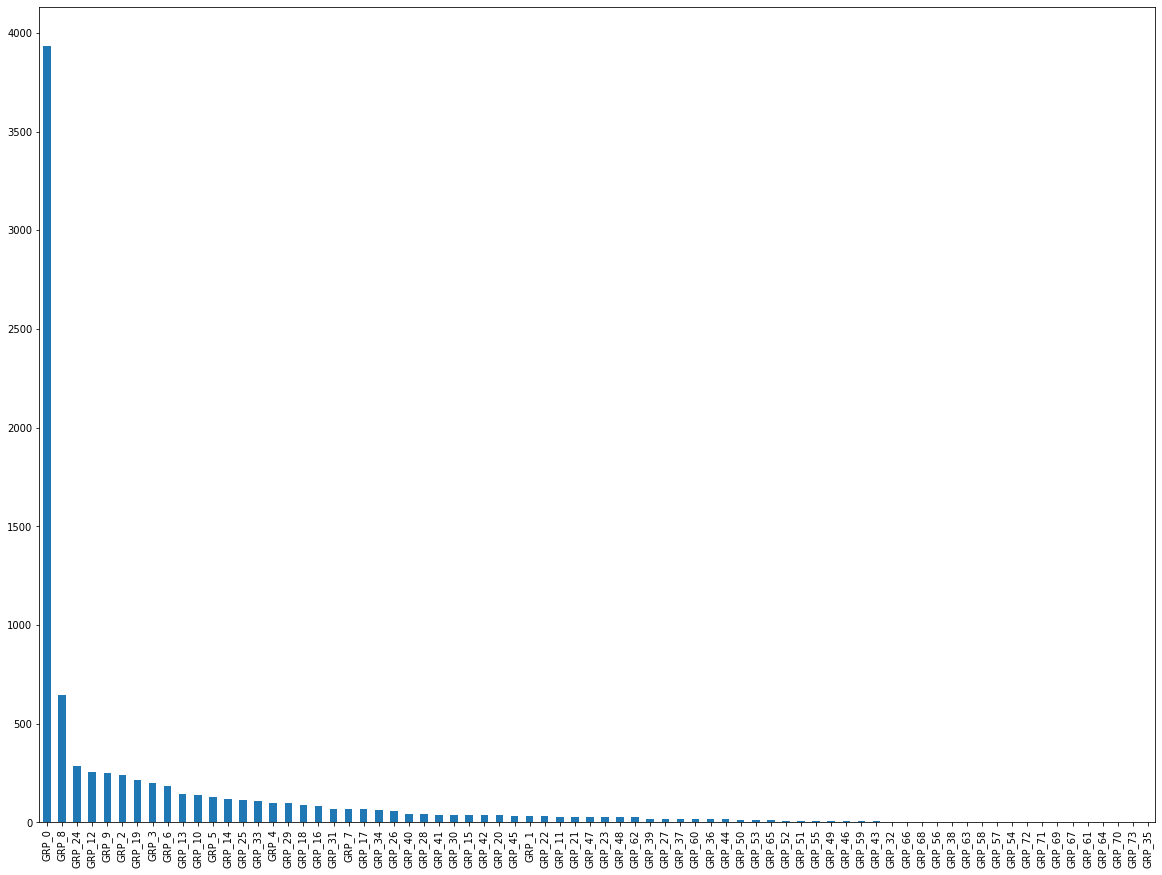

In [ ]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts().plot(kind='bar')

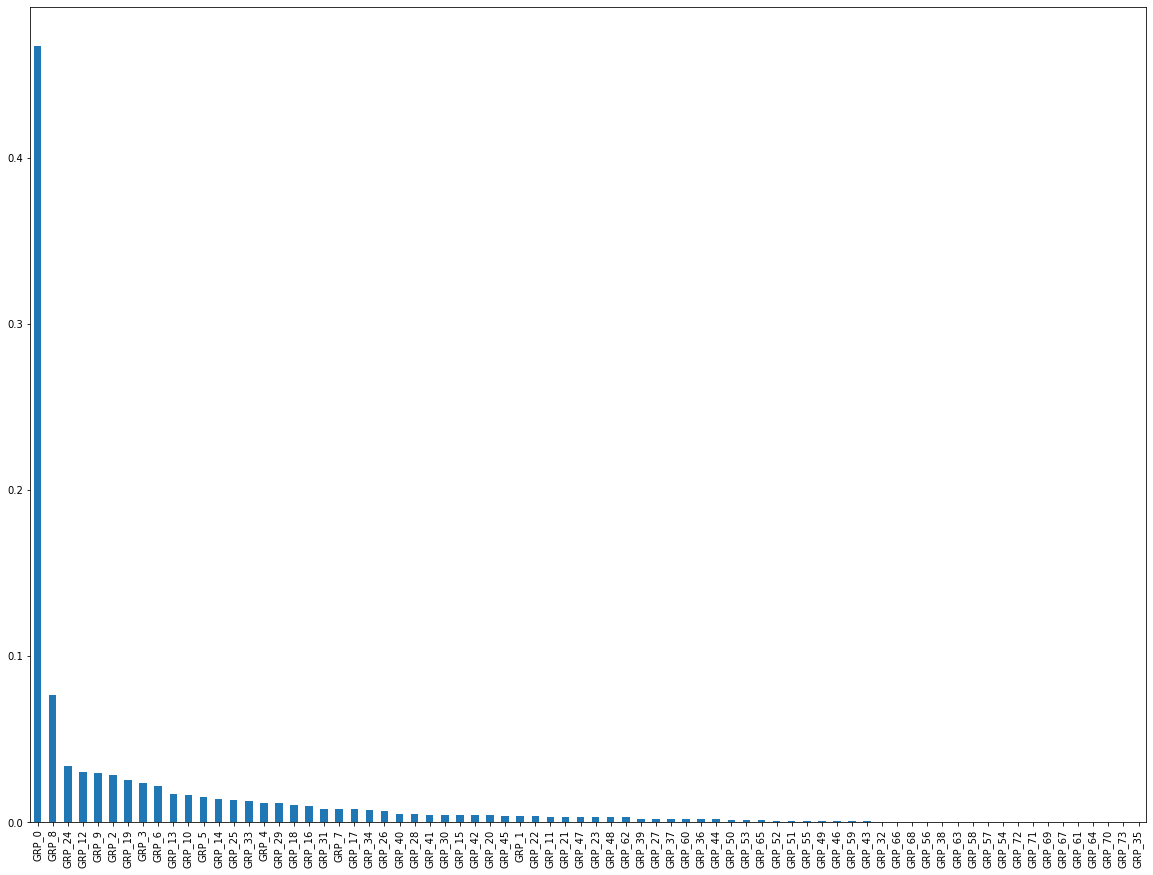

In [ ]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
display(dataset1['Assignment group'].value_counts(normalize=True))

GRP_0     0.467387
GRP_8     0.076631
GRP_24    0.033860
GRP_12    0.030533
GRP_9     0.029939
GRP_2     0.028633
GRP_19    0.025544
GRP_3     0.023761
GRP_6     0.021742
GRP_13    0.017227
GRP_10    0.016633
GRP_5     0.015207
GRP_14    0.014019
GRP_25    0.013782
GRP_33    0.012712
GRP_4     0.011881
GRP_29    0.011524
GRP_18    0.010455
GRP_16    0.010099
GRP_31    0.008198
GRP_7     0.008079
GRP_17    0.008079
GRP_34    0.007366
GRP_26    0.006653
GRP_40    0.005346
GRP_28    0.005228
GRP_41    0.004752
GRP_30    0.004633
GRP_15    0.004515
GRP_42    0.004396
GRP_20    0.004277
GRP_45    0.004158
GRP_1     0.003683
GRP_22    0.003683
GRP_11    0.003564
GRP_21    0.003327
GRP_47    0.003208
GRP_23    0.002970
GRP_48    0.002970
GRP_62    0.002970
GRP_39    0.002257
GRP_27    0.002139
GRP_37    0.001901
GRP_60    0.001901
GRP_36    0.001782
GRP_44    0.001782
GRP_50    0.001663
GRP_53    0.001307
GRP_65    0.001307
GRP_52    0.001069
GRP_51    0.000950
GRP_55    0.000950
GRP_49    0.

In [ ]:
# Find out top 10 callers in terms of frequency of raising tickets in the entire dataset
print('\033[1mTotal caller count:\033[0m', dataset1['Caller'].nunique())
df = pd.DataFrame(dataset1.groupby(['Caller']).size().nlargest(10), columns=['Count']).reset_index()
df.iplot(kind='pie',
         labels='Caller', 
         values='Count', 
         title='Top 10 caller- Pie Chart (Fig-7)',
         colorscale='-spectral',
         pull=[0,0,0,0,0.05,0.1,0.15,0.2,0.25,0.3])

Total caller count: 2950


In [ ]:
# Top 5 callers in each assignment group
top_n = 5
s = dataset1['Caller'].groupby(dataset1['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     126
                 rbozivdq gmlhrtvp      71
                 olckhmvx pcqobjnd      47
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

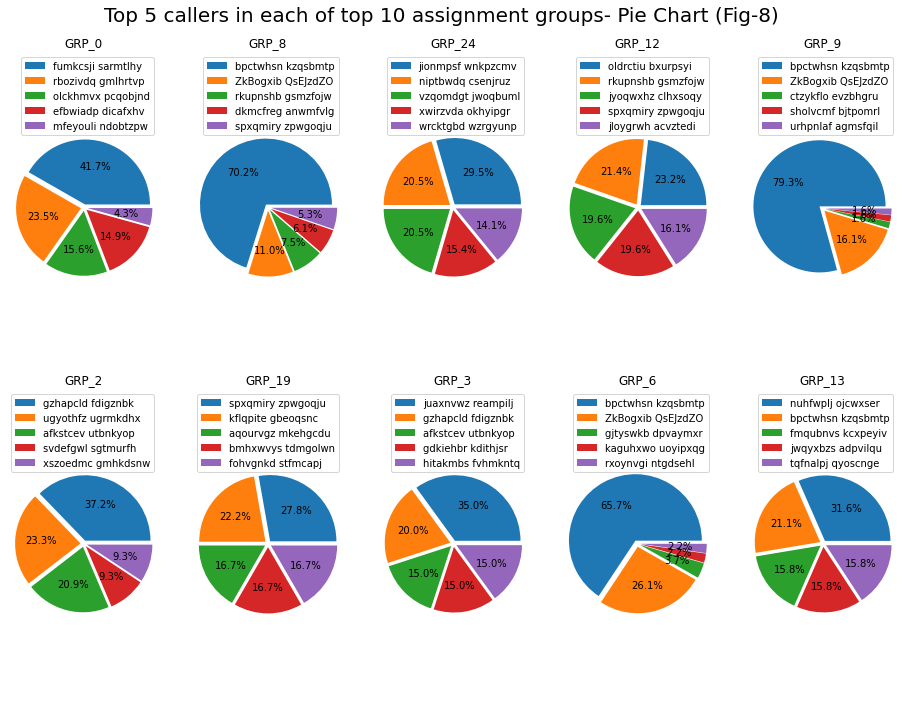

In [ ]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
assgn_grp = pd.DataFrame(dataset1.groupby('Assignment group').size(),columns = ['Count']).reset_index()
top_grps = assgn_grp.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

In [ ]:
#plotting the word count and length characteristics
# combined description text length
dataset1['combined_description'].iplot(
    kind='scatter',
    xTitle='text length',
    yTitle='count',
    title='combined_description Text Length Distribution')

# combined description word count
dataset1['combined_description'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    colorscale='pastel1',
    title='combined_description Word Count Distribution')

Huge class imbalance , so upsampling

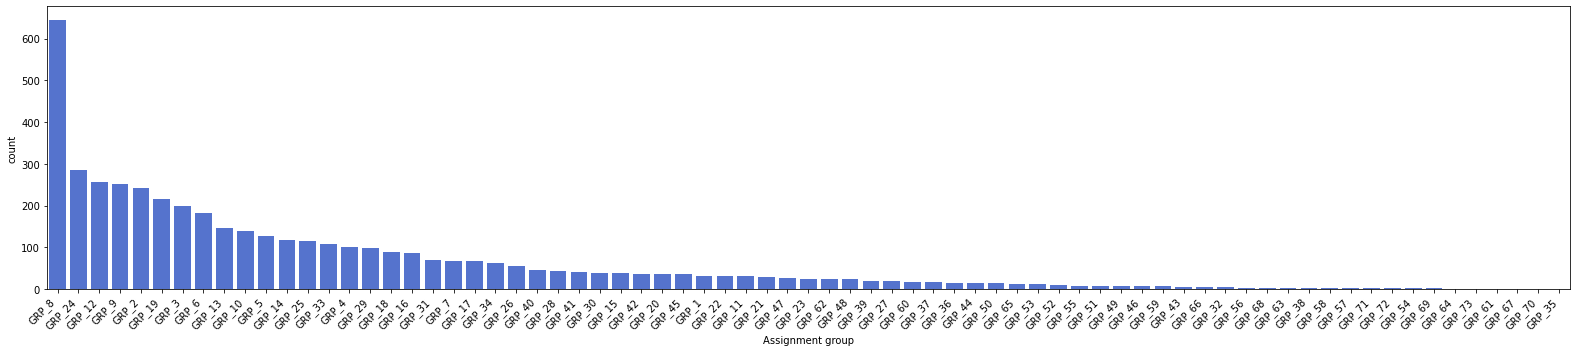

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
dataset1_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = dataset1_nogrp0['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=dataset1_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
maxcount = dataset1_nogrp0['Assignment group'].value_counts().max()
maxcount

645

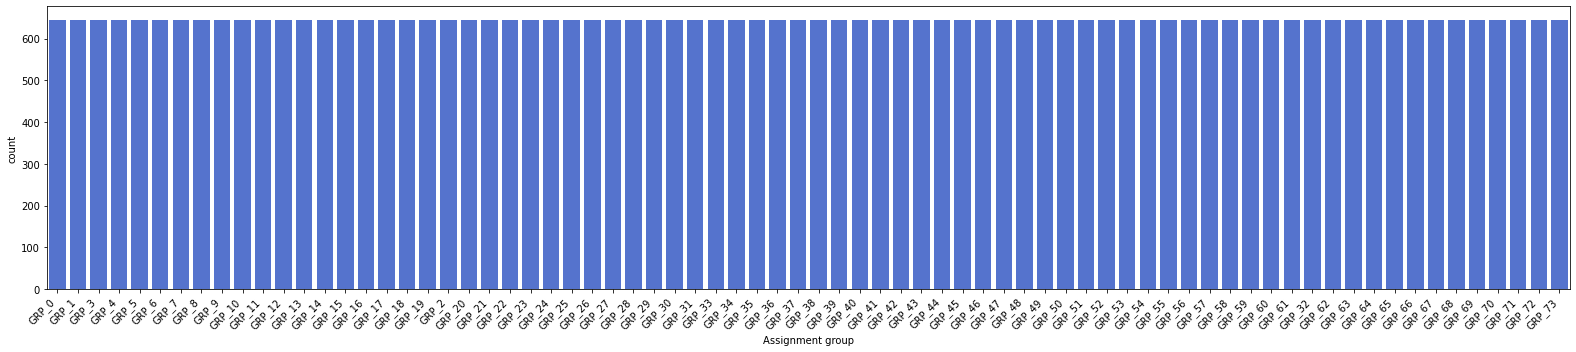

In [ ]:
# Treat the imbalnce in the itTicketDF dataset by resampling to 645.This is for us to try creating a single model which use the whiole dataset & verify the performance

dataset1_upsampled = dataset1[0:0]
for grp in dataset1['Assignment group'].unique():
    dataset1_grp = dataset1[dataset1['Assignment group'] == grp]
    resampled = resample(dataset1_grp, replace=True, n_samples=int(maxcount), random_state=123)
    dataset1_upsampled = dataset1_upsampled.append(resampled)

descending_order = dataset1_upsampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=dataset1_upsampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [7]:
dataset2.head()

Assignment group                               combined_description
0            GRP_0  login issue verify user detailsemployee manage...
1            GRP_0  outlook receive hmjdrvpb.komuaywn@gmail.com he...
2            GRP_0  can not log vpn receive eylqgodm.ybqkwiam@gmai...
3            GRP_0  unable access hrtool page unable access hrtool...
4            GRP_0                            skype error skype error

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

In [4]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

In [5]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in dataset1.index:
  if y_train[i]==0:
    temps=aug.augment(X_train[i],n=2)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(0)

      

NameError: ignored

In [9]:
dataset2_upsampled = dataset2[0:0]
for grp in dataset2['Assignment group'].unique():
    dataset2_grp = dataset2[dataset2['Assignment group'] == grp]
    augmented_sentences=[]
    augmented_sentences_labels=[]
    for i in dataset2_grp.index:
        temps=aug.augment(dataset2_grp[i],n=2)
        for sent in temps:
          augmented_sentences.append(sent)
          augmented_sentences_labels.append(grp)
          
    df = pd.DataFrame([(augmented_sentences, *augmented_sentences_labels) for augmented_sentences, augmented_sentences_labels in zip(augmented_sentences,augmented_sentences_labels)],
         columns=['combined_description','Assignment group'])
    dataset2_upsampled = dataset2_upsampled.append(df)

KeyError: ignored

In [2]:
# Load the dataset into a Pandas dataframe called ticket and check the head of the dataset
dataset2 = pd.read_csv('sample_data/df_ML.csv', )
dataset2.head()

Unnamed: 0             Caller Assignment group  \
0           0  spxjnwir pjlcoqds            GRP_0   
1           1  hmjdrvpb komuaywn            GRP_0   
2           2  eylqgodm ybqkwiam            GRP_0   
3           3  xbkucsvz gcpydteq            GRP_0   
4           4  owlgqjme qhcozdfx            GRP_0   

                                combined_description Language  \
0  login issue verified user detailsemployee mana...       en   
1  outlook received from   hello team my meetings...       en   
2  cant log in to vpn received from   hi i cannot...       en   
3  unable to access hrtool page unable to access ...       en   
4                            skype error skype error       no   

                                  ConvertedToEnglish pred_group  
0  login issue verify user detailsemployee manage...        NaN  
1  outlook receive hello team meetingsskype meeti...        NaN  
2    can not log vpn receive hi can not log vpn best        NaN  
3  unable access hrtool page unable access hrtool...        NaN  
4                            Skype Error Skype Error        NaN

In [33]:
# Create a column for target (assignment group) variable
dataset2['group'] = dataset2['Assignment group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2['group'] = dataset2['group'].astype('int8')
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            8417 non-null   int64 
 1   Caller                8417 non-null   object
 2   Assignment group      8417 non-null   object
 3   combined_description  8417 non-null   object
 4   Language              8417 non-null   object
 5   ConvertedToEnglish    8416 non-null   object
 6   pred_group            301 non-null    object
 7   group                 8417 non-null   int8  
dtypes: int64(1), int8(1), object(6)
memory usage: 468.6+ KB


In [34]:
dataset2.tail()

Unnamed: 0             Caller Assignment group  \
8412        8412  avglmrts vhqmtiua           GRP_29   
8413        8413  rbozivdq gmlhrtvp            GRP_0   
8414        8414  oybwdsgx oxyhwrfz            GRP_0   
8415        8415  ufawcgob aowhxjky           GRP_62   
8416        8416  kqvbrspl jyzoklfx           GRP_49   

                                   combined_description Language  \
8412  emails not coming in from zz mail received fro...       en   
8413    telephonysoftware issue telephonysoftware issue       en   
8414  vip windows password reset for tifpdchb pedxru...       en   
8415  machine nÃ£o estÃ¡ funcionando i am unable to ...       en   
8416  an mehreren pcs lassen sich verschiedene prgra...       de   

                                     ConvertedToEnglish pred_group  group  
8412  email come zz mail receive good afternoon rece...        NaN     29  
8413    telephonysoftware issue telephonysoftware issue      GRP_7      0  
8414  vip windows password reset tifpdchb pedxruyf v...        NaN      0  
8415  machine nÃ£o estÃ ¡ funcionando unable access ...        NaN     62  
8416  several pc open various prgramdntyms several p...        NaN     49

In [58]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(dataset2.combined_description, 
                                                    dataset2.group, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6733,) (1684,)
Shape of the test set: (6733,) (1684,)


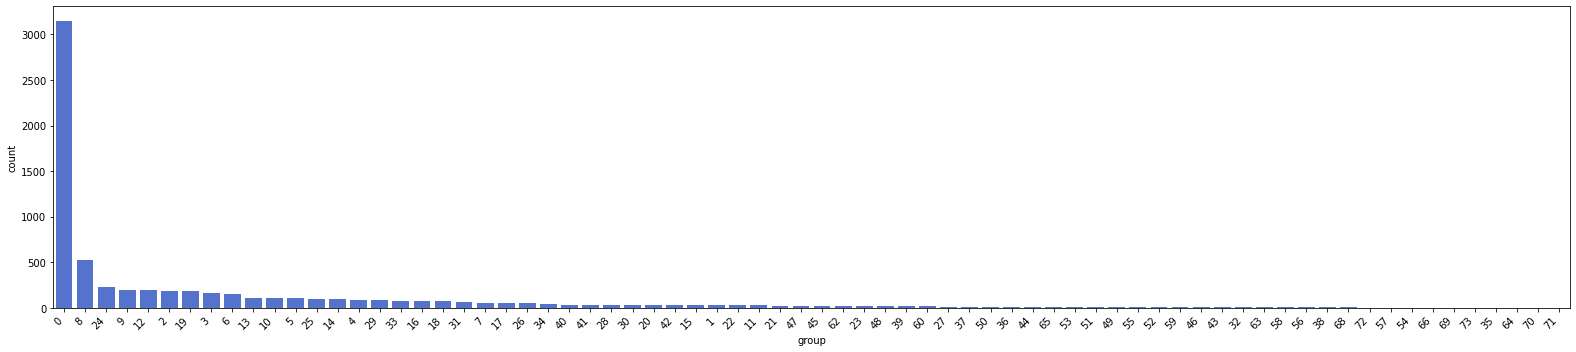

In [49]:
#Create Dataset 
y_train_df_old = pd. DataFrame(y_train,columns=['group'])
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df_old['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_old, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

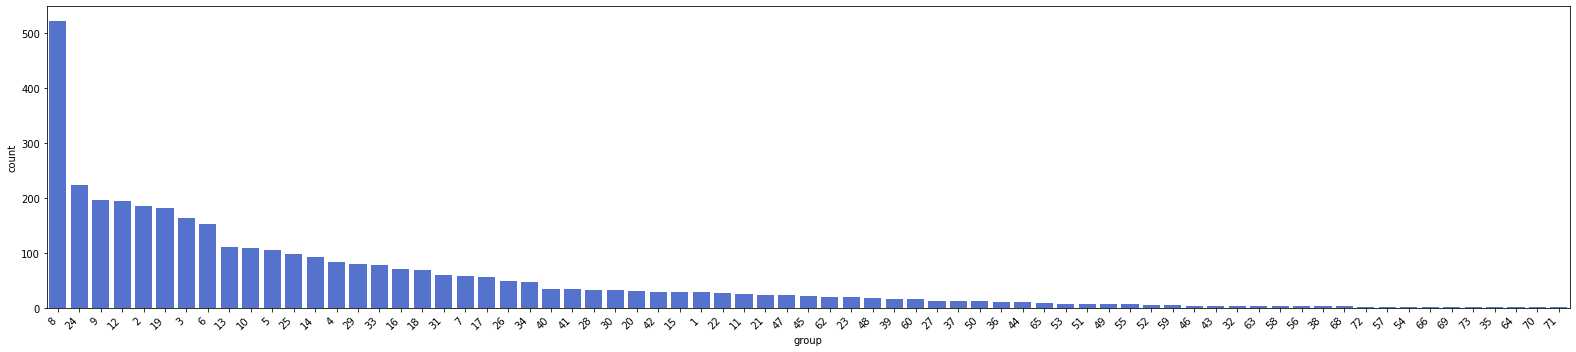

In [50]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_old_nogrp0 = y_train_df_old[y_train_df_old['group'] != 0]

descending_order = y_train_df_old_nogrp0['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_old_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

In [59]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  if y_train[i] in (24,9,12,2,19,3,6):
    temps=aug.augment(X_train[i],n=3)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (13,10,5,25,14,4,29,33,16,18,31,7,17,26,34):    
    temps=aug.augment(X_train[i],n=6)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (72,57,54,66,69,73,35,64,70,71):    
    temps=aug.augment(X_train[i],n=50)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] not in (0,8,24,9,12,2,19,3,6,13,10,5,25,14,4,29,33,16,18,31,7,17,26,34,72,57,54,66,69,73,35,64,70,71):    
    temps=aug.augment(X_train[i],n=12)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])

In [60]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

(25372,)
(25372,)


In [61]:
y_train_df = pd. DataFrame(y_train,columns=['group'])

In [62]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25372 entries, 0 to 25371
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   group   25372 non-null  int8 
dtypes: int8(1)
memory usage: 24.9 KB


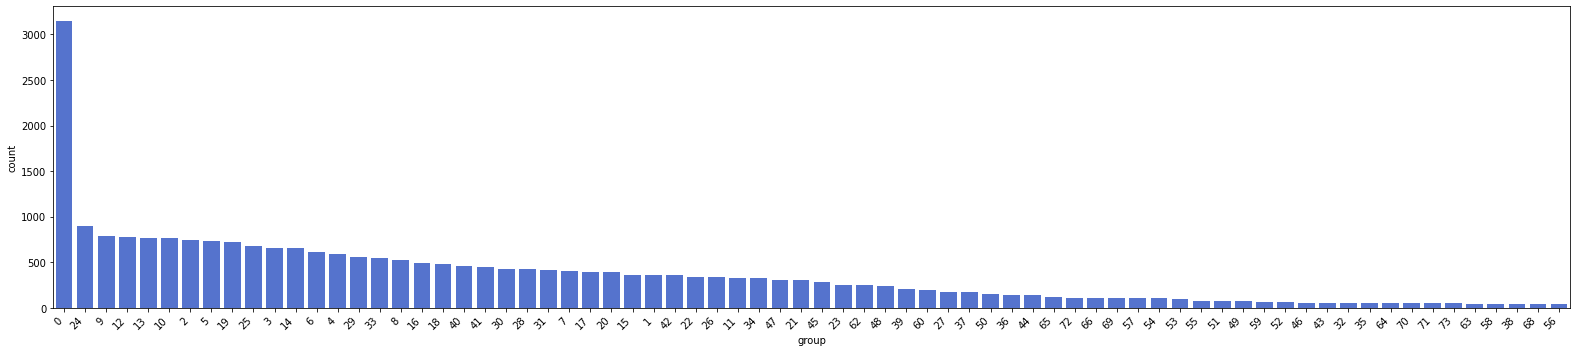

In [63]:
#Create Dataset 
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

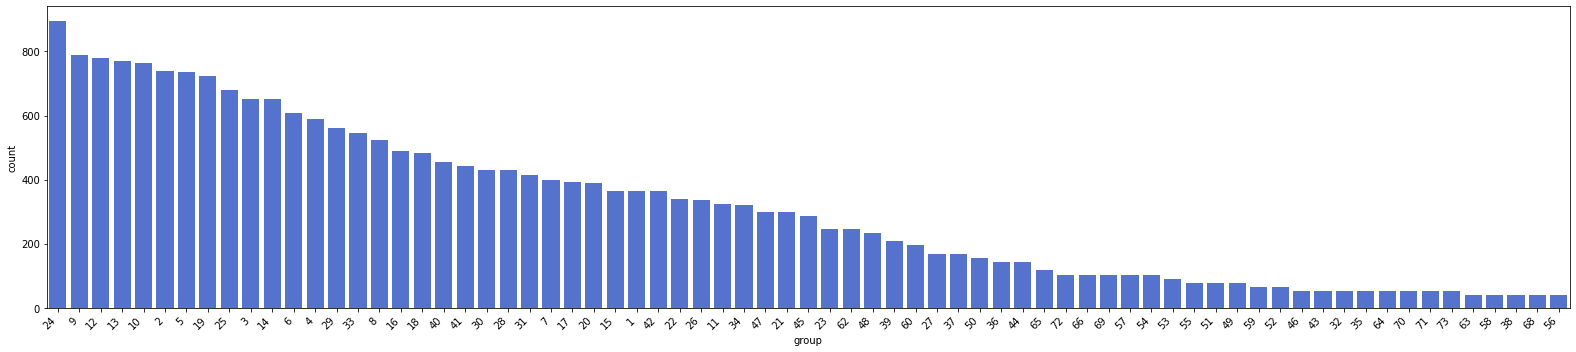

In [64]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_nogrp0 = y_train_df[y_train_df['group'] != 0]

descending_order = y_train_df_nogrp0['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [65]:
y_train_df.groupby(['group']).size()

group
0     3151
1      364
2      740
3      652
4      588
5      735
6      608
7      399
8      523
9      788
10     763
11     325
12     780
13     770
14     651
15     364
16     490
17     392
18     483
19     724
20     390
21     299
22     338
23     247
24     896
25     679
26     336
27     169
28     429
29     560
30     429
31     413
32      52
33     546
34     322
35      51
36     143
37     169
38      39
39     208
40     455
41     442
42     364
43      52
44     143
45     286
46      52
47     299
48     234
49      78
50     156
51      78
52      65
53      91
54     102
55      78
56      39
57     102
58      39
59      65
60     195
62     247
63      39
64      51
65     117
66     102
68      39
69     102
70      51
71      51
72     102
73      51
dtype: int64